In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


**Loading and Preprocessing the Dataset**

In [2]:
import pandas as pd

# Load the dataset
try:
    dataset = pd.read_csv('/content/gdrive/MyDrive/Dataset/Articles.csv', encoding='ISO-8859-1')
except UnicodeDecodeError as e:
    print("Error reading file:", e)

# Preprocess the dataset (e.g., removing null values, extracting relevant text)
# Assuming 'text' column contains the document text
dataset.dropna(subset=['Article'], inplace=True)
documents = dataset['Article'].tolist()

In [4]:
!pip install -U sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 13.2 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125923 sha256=43edab60b95e6de90bf9f672ed6c09b1aaaa49dda7383a12ca55715847f69579
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence-transformers


**Clustering documents with embeddings using Sentence Transformers**

In [5]:
from sentence_transformers import SentenceTransformer
import numpy as np

# Load a pre-trained model
model = SentenceTransformer('all-MiniLM-L6-v2')  # This is a smaller, faster model

# Generate embeddings
embeddings = model.encode(documents, show_progress_bar=True)

# Ensure the embeddings are in the correct format for scikit-learn
embeddings = np.vstack(embeddings)


.gitattributes:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

data_config.json:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

train_script.py:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

Batches:   0%|          | 0/85 [00:00<?, ?it/s]

**Clustering with scikit-learn**

In [6]:
from sklearn.cluster import KMeans
import numpy as np

# Convert embeddings to a suitable format for scikit-learn
embeddings = np.vstack(embeddings)

# Perform clustering
num_clusters = 5  # You can choose a different number
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(embeddings)

# Get cluster labels
labels = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


**Visualizing the Clusters - using dimensionality reduction techniques like PCA or t-SNE**

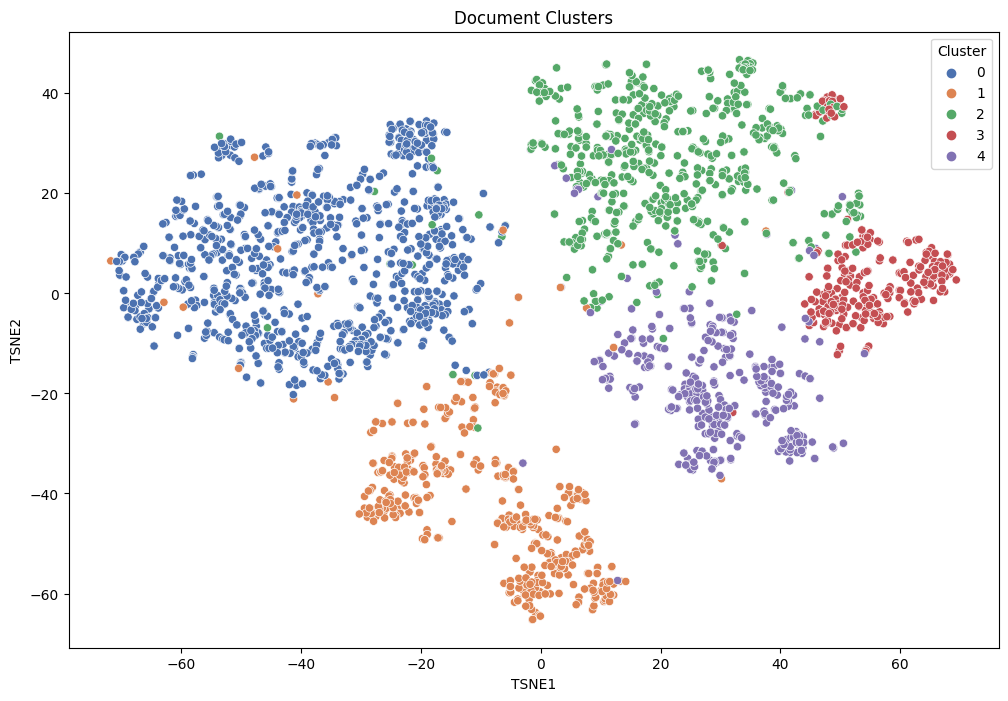

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create a DataFrame for the plot
plot_data = pd.DataFrame({
    'TSNE1': reduced_embeddings[:, 0],
    'TSNE2': reduced_embeddings[:, 1],
    'Cluster': labels
})

# Plotting using Seaborn
plt.figure(figsize=(12, 8))
sns.scatterplot(x='TSNE1', y='TSNE2', hue='Cluster', data=plot_data, palette="deep")
plt.title('Document Clusters')
plt.show()

**Evaluating the clusters using various metrics like Silhouette Score**

In [9]:
from sklearn.metrics import silhouette_score

# Compute the silhouette score
score = silhouette_score(embeddings, labels)

print(f"Silhouette Score: {score}")

Silhouette Score: 0.10313787311315536
